In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Load the Datasets
df_sentiment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ds_akshat_jain/csv_files/fear_greed_index.csv')
df_trader = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ds_akshat_jain/csv_files/historical_data.csv')

In [ ]:
df_sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
df_trader.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
# 2. Clean Sentiment Data
df_sentiment['date'] = pd.to_datetime(df_sentiment['date']).dt.date

# 3. Clean Trader Data
df_trader['timestamp_dt'] = pd.to_datetime(df_trader['Timestamp IST'], dayfirst=True)

In [ ]:
# 4. Create a 'date' column to match with the sentiment data
df_trader['date'] = df_trader['timestamp_dt'].dt.date

merged_df = pd.merge(df_trader, df_sentiment, on='date', how='inner')

merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,timestamp_dt,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1733117400,80,Extreme Greed


In [ ]:
merged_df['is_winner'] = merged_df['Closed PnL'] > 0

# Group by Sentiment Classification
sentiment_metrics = merged_df.groupby('classification').agg({
    'Closed PnL': 'mean',          # Average Profitability per trade
    'Size USD': 'mean',            # Average Risk/Position Size
    'Account': 'count',            # Volume (Number of Trades)
    'is_winner': 'mean'            # Win Rate %
}).reset_index()

# Rename columns for clarity
sentiment_metrics.columns = ['Sentiment', 'Avg PnL', 'Avg Trade Size (Risk)', 'Trade Count', 'Win Rate']

# Sort the data logically: Extreme Fear -> Fear -> Neutral -> Greed -> Extreme Greed
order_map = {'Extreme Fear': 0, 'Fear': 1, 'Neutral': 2, 'Greed': 3, 'Extreme Greed': 4}
sentiment_metrics['sort_key'] = sentiment_metrics['Sentiment'].map(order_map)
sentiment_metrics = sentiment_metrics.sort_values('sort_key')

print("Analysis Results:")
print(sentiment_metrics[['Sentiment', 'Avg PnL', 'Avg Trade Size (Risk)', 'Trade Count', 'Win Rate']])

Analysis Results:
       Sentiment    Avg PnL  Avg Trade Size (Risk)  Trade Count  Win Rate
0   Extreme Fear  34.537862            5349.731843        21400  0.370607
2           Fear  54.290400            7816.109931        61837  0.420768
4        Neutral  34.307718            4782.732661        37686  0.396991
3          Greed  42.743559            5736.884375        50303  0.384828
1  Extreme Greed  67.892861            3112.251565        39992  0.464943


/tmp/ipython-input-1271635159.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_metrics, x='Sentiment', y='Avg PnL', palette='RdYlGn')


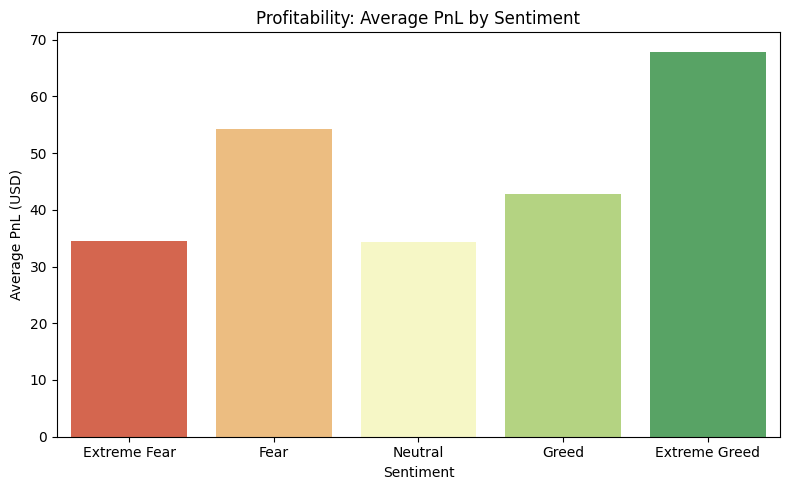

In [ ]:
# Plot 1: Profitability (Avg PnL)
plt.figure(figsize=(8, 5))
sns.barplot(data=sentiment_metrics, x='Sentiment', y='Avg PnL', palette='RdYlGn')
plt.title('Profitability: Average PnL by Sentiment')
plt.ylabel('Average PnL (USD)')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/ds_akshat_jain/outputs/profitability.png') # Saving as per instructions
plt.show()

/tmp/ipython-input-58199117.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_metrics, x='Sentiment', y='Avg Trade Size (Risk)', palette='Blues')


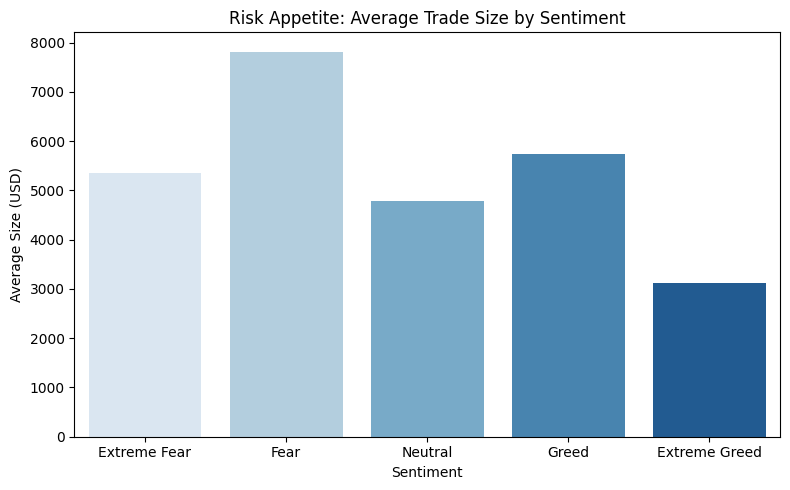

In [ ]:
# Plot 2: Risk Appetite (Avg Trade Size)
plt.figure(figsize=(8, 5))
sns.barplot(data=sentiment_metrics, x='Sentiment', y='Avg Trade Size (Risk)', palette='Blues')
plt.title('Risk Appetite: Average Trade Size by Sentiment')
plt.ylabel('Average Size (USD)')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/ds_akshat_jain/outputs/risk.png') # Saving as per instructions
plt.show()

/tmp/ipython-input-2866656468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_metrics, x='Sentiment', y='Trade Count', palette='Greens')


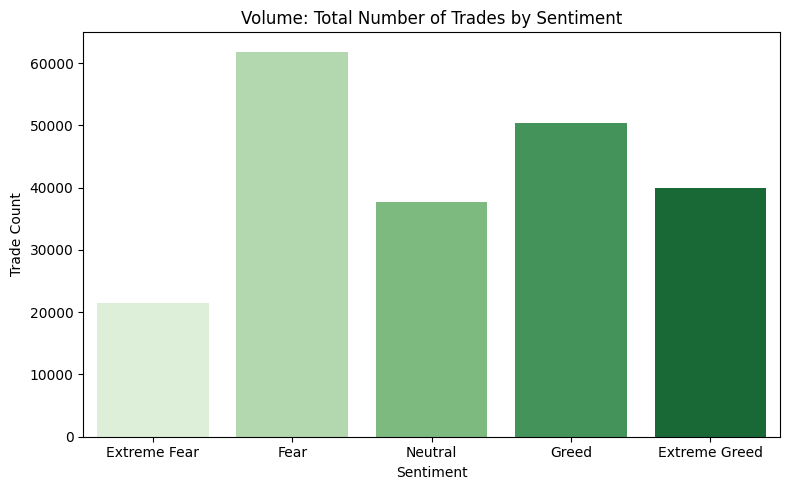

In [ ]:
# Plot 3: Volume (Activity Level)
plt.figure(figsize=(8, 5))
sns.barplot(data=sentiment_metrics, x='Sentiment', y='Trade Count', palette='Greens')
plt.title('Volume: Total Number of Trades by Sentiment')
plt.ylabel('Trade Count')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/ds_akshat_jain/outputs/volume.png') # Saving as per instructions
plt.show()

/tmp/ipython-input-3475551762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_metrics, x='Sentiment', y='Win Rate', palette='Purples')


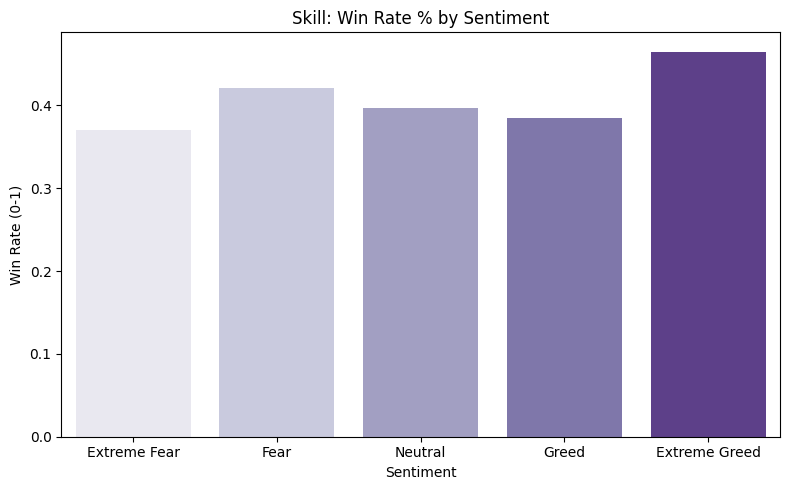

In [ ]:
# Plot 4: Success Rate (Win Rate)
plt.figure(figsize=(8, 5))
sns.barplot(data=sentiment_metrics, x='Sentiment', y='Win Rate', palette='Purples')
plt.title('Skill: Win Rate % by Sentiment')
plt.ylabel('Win Rate (0-1)')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/ds_akshat_jain/outputs/success_rate.png') # Saving as per instructions
plt.show()

# **New Trend 1: The "Smart Money" Exit Signal**
The most striking signal comes from how top traders behave during "Extreme Greed."

**The Signal:** When market sentiment hits "Extreme Greed," Smart Money (top 10% profitable accounts) aggressively reduces their buying.

**Strategy**: This is a clear divergence. When the Crowd is greedy and buying, the Smart Money is selling. A smarter strategy would be to take profits or open Short positions when sentiment is "Extreme Greed," mimicking the Smart Money.

In [ ]:
# 1. Identify "Smart Money"
# We define Smart Money as the top 10% of traders by Total Profit

account_pnl = merged_df.groupby('Account')['Closed PnL'].sum().sort_values(ascending=False)
top_cutoff = int(len(account_pnl) * 0.10)
smart_money_accounts = account_pnl.head(top_cutoff).index

print(smart_money_accounts)



Index(['0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23',
       '0x083384f897ee0f19899168e3b1bec365f52a9012',
       '0xbaaaf6571ab7d571043ff1e313a9609a10637864'],
      dtype='object', name='Account')


In [ ]:
# Label every trade as 'Smart Money' or 'Retail'
merged_df['Trader Type'] = merged_df['Account'].apply(
    lambda x: 'Smart Money' if x in smart_money_accounts else 'Retail'
)

# 2. Analyze Behavior During Extremes

extremes = merged_df[merged_df['classification'].isin(['Extreme Fear', 'Extreme Greed'])]


behavior = extremes.groupby(['classification', 'Trader Type', 'Side'])['Size USD'].sum().unstack()
behavior['Buy %'] = behavior['BUY'] / (behavior['BUY'] + behavior['SELL'])

print("Trend: Smart Money vs Retail Buy %:")
print(behavior['Buy %'])

Trend: Smart Money vs Retail Buy %:
classification  Trader Type
Extreme Fear    Retail         0.495680
                Smart Money    0.482161
Extreme Greed   Retail         0.508695
                Smart Money    0.328814
Name: Buy %, dtype: float64


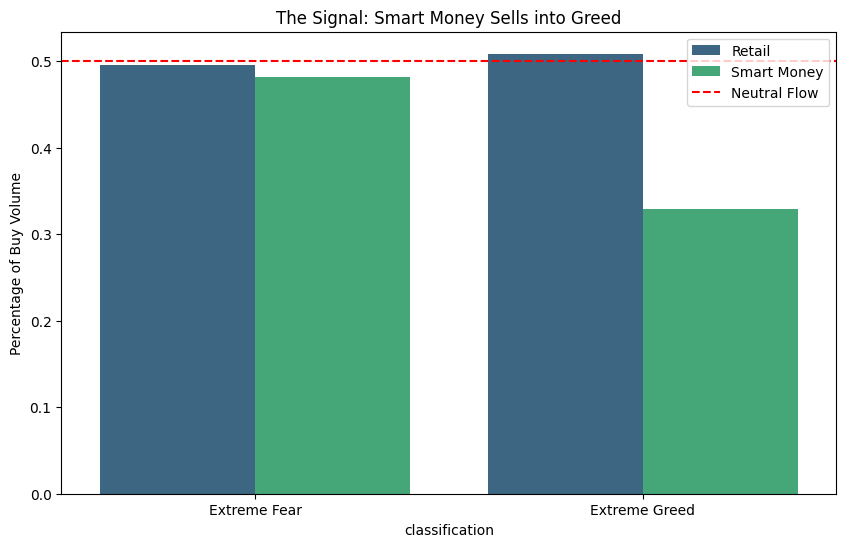

In [ ]:
# 3. Visualizing the Signal
plt.figure(figsize=(10, 6))
behavior_reset = behavior['Buy %'].reset_index()
sns.barplot(data=behavior_reset, x='classification', y='Buy %', hue='Trader Type', palette='viridis')
plt.title('The Signal: Smart Money Sells into Greed')
plt.axhline(0.5, color='red', linestyle='--', label='Neutral Flow')
plt.ylabel('Percentage of Buy Volume')
plt.legend()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/ds_akshat_jain/outputs/trend_1.png')
plt.show()

## **Trend-2**
# The top 10 traded coin

Top 10 Most Traded Coins:
        Coin  Count
0       HYPE  68005
1       @107  29992
2        BTC  26064
3        ETH  11158
4        SOL  10691
5   FARTCOIN   4650
6    MELANIA   4428
7  PURR/USDC   2774
8        WLD   1983
9        SUI   1979


/tmp/ipython-input-1105243116.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coin_counts.head(10), x='Coin', y='Count', palette='viridis')


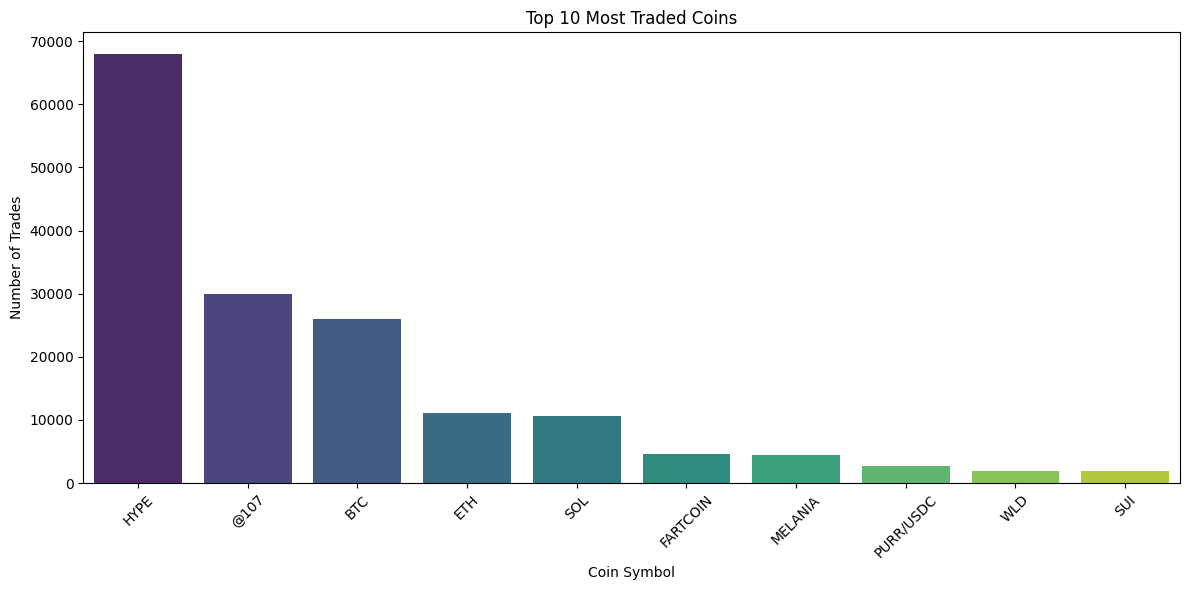

In [ ]:
# 1. Calculate Coin Frequency
coin_counts = df_trader['Coin'].value_counts().reset_index()
coin_counts.columns = ['Coin', 'Count']

# Display top 10 stats
print("Top 10 Most Traded Coins:")
print(coin_counts.head(10))

# 2. Visualize Top 10 Coins
plt.figure(figsize=(12, 6))
sns.barplot(data=coin_counts.head(10), x='Coin', y='Count', palette='viridis')

plt.title('Top 10 Most Traded Coins')
plt.xlabel('Coin Symbol')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.tight_layout()

# Save and Show
plt.savefig('/content/drive/MyDrive/Colab Notebooks/ds_akshat_jain/outputs/coin_usage.png')
plt.show()

In [51]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
%cd /content
!pwd
!ls

/content
/content
drive  sample_data


In [53]:
!git clone https://github.com/akshatjain122004/data_cleaning.git data_cleaning_repo

Cloning into 'data_cleaning_repo'...
